In [1]:
# 쇼핑몰 고객주문데이터로
# 매울, 가장 많이 팔린 데이터 확인 해보겠습니다

### 학습목표
1. 아이템별 지표 확인하기
2. 시간별 지역별 판매 지표 확인하기

In [2]:
import numpy as np
import pandas as pd
# seaborn : matplotlib 에서 좀더 확장된 기능 (풍부한 + 정제된 UI 게종)
import seaborn as sns
COLORS = sns.color_palette()   # seaborn 에서 정의해둔 색상팔레트

%matplotlib inline

#### 데이터 로딩
1. 정제된 데이터 사용(retail.csv)

In [4]:
dtypes = {
    'UnitPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}
retail = pd.read_csv('../Data/OnlineRetailClean.csv', dtype=dtypes)  # dtype 지정 가능
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


#### 날짜 타입 데이터 변환
 - 문자열로 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이

In [5]:
# 분석 용이성을 위해 한가지 더 추가하께요
# 날짜의 타입을 함 보겠씁니다

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int32  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float32
 7   CustomerID     397884 non-null  int32  
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(2), object(4)
memory usage: 25.8+ MB


In [7]:
# 관찰
# InvoiceDate    397884 non-null  object   <-- 데이터 타입이 문자임을 확인 가능하다
# 날짜 데이터는 '날짜 타입' 으로 바꾸는 것이 분석에 용이하기에
# 날짜로 타입 변경을 해보도록 하겠씁니다

In [8]:
pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)

# 원하는 형식의 데이터 설정도 가능하다.
# infer_datetime_format=True  <-- 데이터를 살펴보아, 자동으로 포맷 세팅

# ↓ 아래에서 확인해보자.

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
397879   2011-12-09 12:50:00
397880   2011-12-09 12:50:00
397881   2011-12-09 12:50:00
397882   2011-12-09 12:50:00
397883   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [9]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.info()

# 결과 : InvoiceDate  타입이 object --> datetime64[ns] 로 변환
#   왜 바꾸는지는 이따가 다시 설명...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


In [10]:
# 이제 '특정 기간'의 매출 데이터를 가져와 보겠습니다.

---
## 해당 기간 동안의 매출
 - 전체 매출
 - 국가별 매출
 - 월별 매출
 - 요일별 매출
 - 시간별 매출

# 전체 매출
"작년부터 올해까지 매출 데이터는?"

In [12]:
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

# 8911407.904 의 수익 발행 (단위는 아마도 유로?)

8911407.904

# 국가별 매출
"어느나라에서 매출을 많이 올리고 있을까"

In [13]:
# 국가별로 groupby
retail.groupby('Country')

In [14]:
# aggregate 수행. 여기선 합계 sum() 사용
retail.groupby('Country').sum()

,Unnamed: 0,InvoiceNo,Quantity,UnitPrice,CustomerID,CheckoutPrice
Country,,,,,,
Australia,265381714,657415628,83901.0,3.612500e+03,1.472127e+07,1.385213e+05
Austria,118301156,223822318,4881.0,1.693900e+03,4.982601e+06,1.019868e+04
Bahrain,3144388,9397437,260.0,7.895000e+01,2.100270e+05,5.484000e+02
Belgium,561892335,1138462862,23237.0,7.372850e+03,2.524670e+07,4.119634e+04
Brazil,5034064,17606432,356.0,1.426000e+02,4.086080e+05,1.143600e+03
Canada,36331486,84252636,2763.0,9.105800e+02,2.615483e+06,3.666380e+03
Channel Islands,190820428,417972473,9491.0,3.389650e+03,1.113834e+07,2.045044e+04
Cyprus,145370145,341888568,6361.0,3.506180e+03,7.616904e+06,1.359038e+04
Czech Republic,5389080,13876340,671.0,7.827000e+01,3.195250e+05,8.267400e+02


In [15]:
# CheckoutPrice 만 뽑기
retail.groupby('Country').sum()['CheckoutPrice'] 

Country
Australia               1.385213e+05
Austria                 1.019868e+04
Bahrain                 5.484000e+02
Belgium                 4.119634e+04
Brazil                  1.143600e+03
Canada                  3.666380e+03
Channel Islands         2.045044e+04
Cyprus                  1.359038e+04
Czech Republic          8.267400e+02
Denmark                 1.895534e+04
EIRE                    2.655459e+05
European Community      1.300250e+03
Finland                 2.254608e+04
France                  2.090240e+05
Germany                 2.288671e+05
Greece                  4.760520e+03
Iceland                 4.310000e+03
Israel                  7.221690e+03
Italy                   1.748324e+04
Japan                   3.741637e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   2.725590e+03
Netherlands             2.854463e+05
Norway                  3.616544e+04
Poland                  7.334650e+03
Portugal                3.3439

In [16]:
# 정렬도 해봅시다.
retail.groupby('Country').sum()['CheckoutPrice'].sort_values()

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

In [17]:
# 변수에 담기
rev_by_contries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_contries

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

In [18]:
# Saudi Arabia            1.459200e+02

# United Kingdom          7.308392e+06

# 개발자야 위 수치만 보면 알수 있지만.
# 보통 비즈니스 팀에 넘겨줄때는 UI 적으로 그래프등을 같이 넘겨준다.

# 간단하게 막대 그래프로 보여주죠

In [20]:
COLORS   # seaborn 에서 가져온 팔레트

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<AxesSubplot:xlabel='Country'>

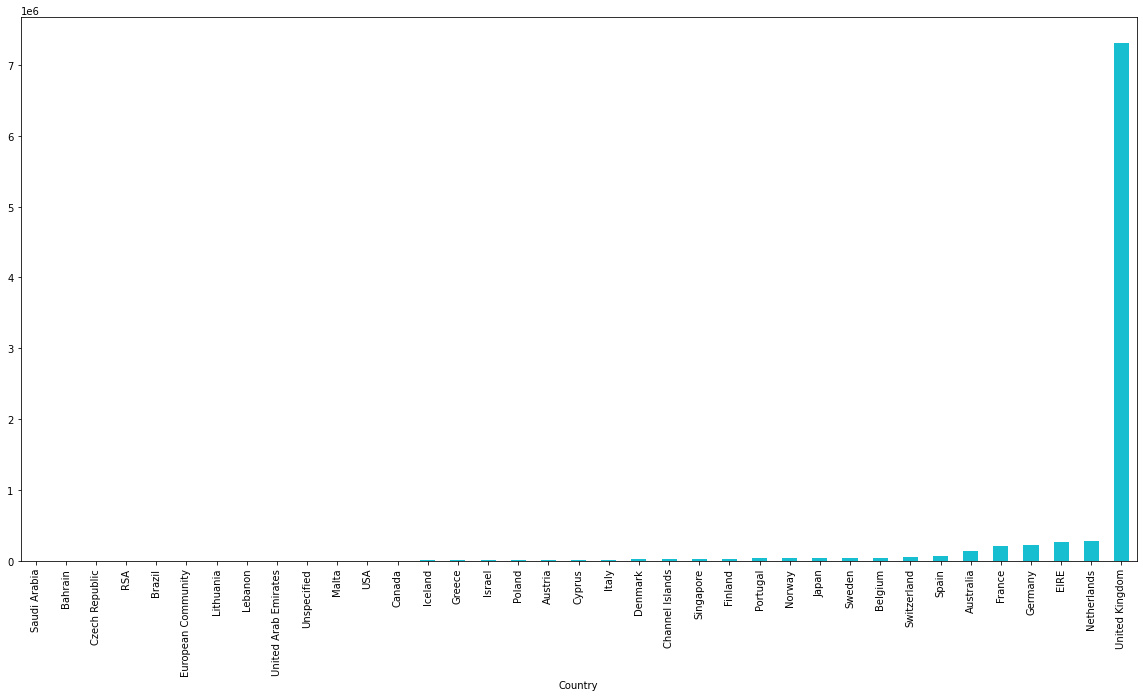

In [21]:
rev_by_contries.plot(kind="bar", color=COLORS[-1], figsize=(20, 10))
# figsize : 전체 그래프 크기


[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

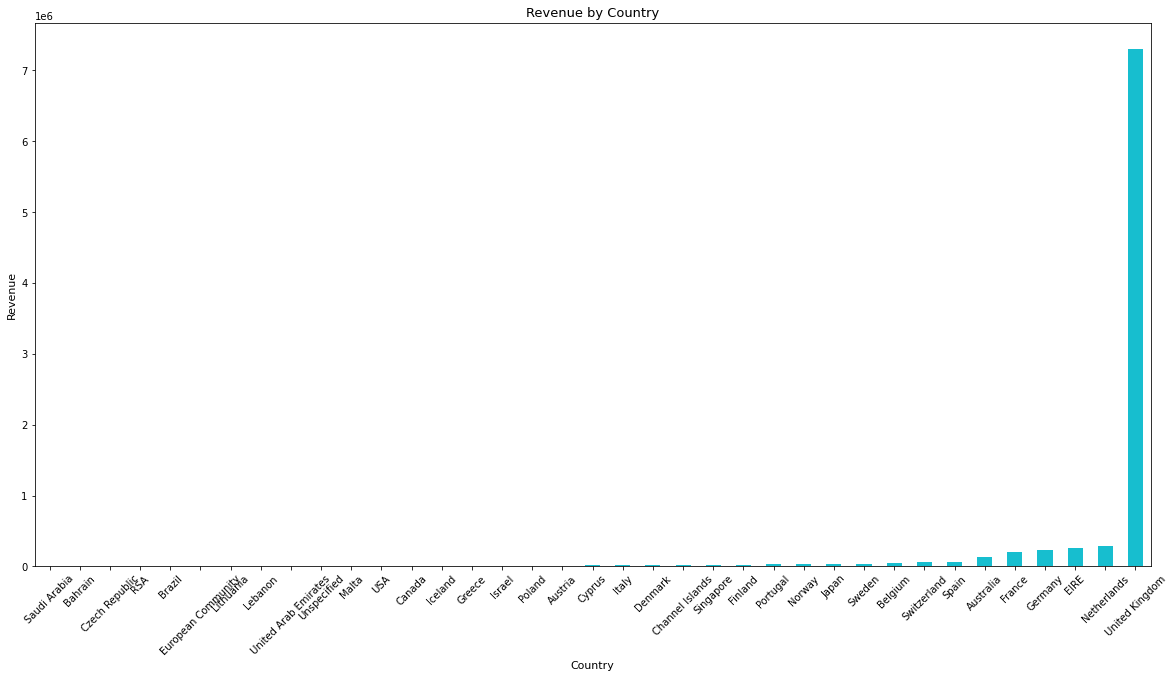

In [22]:
# 그래프에 설명을 추가해보겠습니다
plot = rev_by_contries.plot(kind="bar", color=COLORS[-1], figsize=(20, 10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title("Revenue by Country", fontsize=13)
plot.set_xticklabels(labels=rev_by_contries.index, rotation=45)

In [24]:
# 비율을 알고 싶다면
rev_by_contries / total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

In [ ]:
# 관찰
# 1등이 영국 . 약 82%
# 2등이 네덜란드  3.2% 

# 데이터를 보면 사실상 거의 영국에만 사업을 집중하는 형태

In [25]:
# 앞으로 그래프 계속 그릴거기 때문에 
# 이를 함수로 만들어 보겠습니다

#### 그래프 유틸 함수

In [27]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
    plot = df.plot(kind="bar", color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

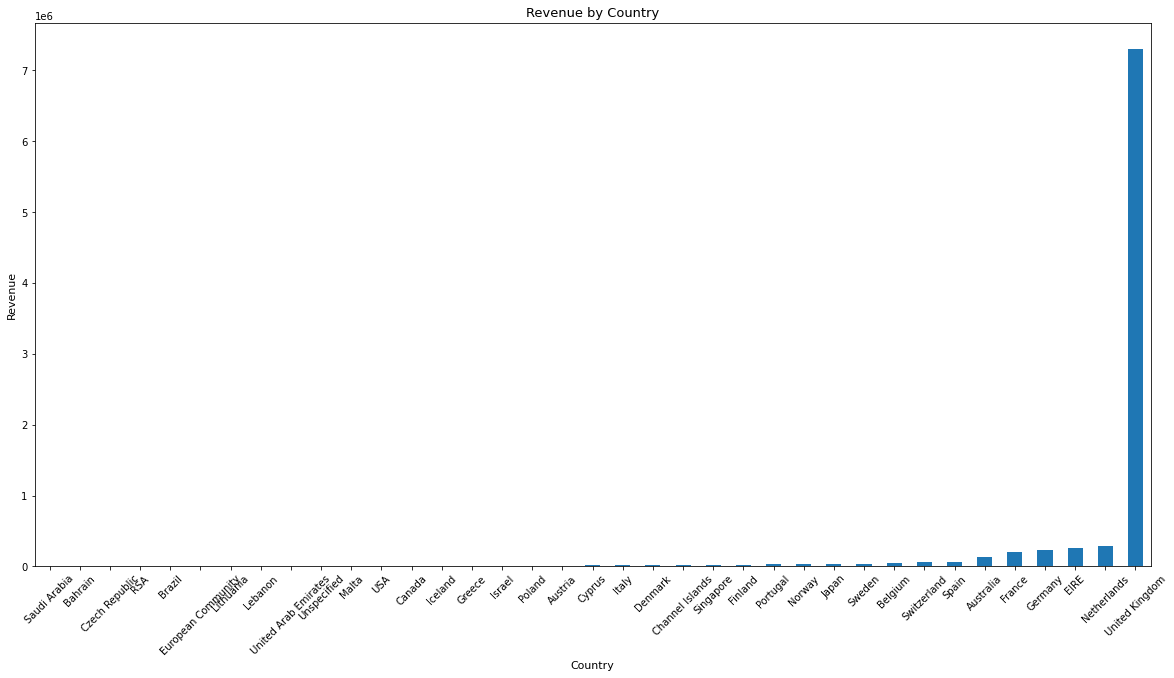

In [28]:
# 함수 동작 확인
plot_bar(rev_by_contries, 'Country', 'Revenue', 'Revenue by Country')

`#매출, 가장 많이 팔린 아이템 확인하기 - 2`

# 월별 매출

In [30]:
# '월별' 이니까, InvoiceDate 를 활용해야 겠죠?

In [41]:
# 값의 타입을 봅시다  (데이터 하나만 확인)
time_stamp = retail['InvoiceDate'][0]
time_stamp 

Timestamp('2010-12-01 08:26:00')

In [42]:
time_stamp.year

2010

In [43]:
time_stamp.month

12

In [73]:
time_stamp.dayofweek  # 요일  0 : 월요일,  6 : 일요일

2

In [44]:
# 자 이제 다시 봅시다.
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# InvoiceDate 로 그룹핑 하기에는 
# 연도-월-일 시:분:초  를 갖고 있기 때문에 그냥 그룹핑은 안됩니다.
# 뭔가 '함수' 등을 이용해 '월' 만 뽑아서 그룹핑을 진행해야 합니다

In [32]:
# 우선, 함 InvoceDate 로 인덱스 만들어 보자
retail.set_index('InvoiceDate')

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,CheckoutPrice
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
2010-12-01 08:26:00,1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
2010-12-01 08:26:00,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20
2011-12-09 12:50:00,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60
2011-12-09 12:50:00,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60


In [49]:
# 그리고 groupby.groupby()
# retail.set_index('InvoiceDate').groupby(함수)

# 함수를 하나 만들어 봅시다
# 1월은 '01',  2월은 '02'
def extract_month(date):
    month = str(date.month)
    # 연도에 대한 값만 문자열 바꾸기
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

# 2010-12-01 08:26:00 ==> 201012  로 변환될거다

In [55]:
# 함수 동작 확인
extract_month(retail['InvoiceDate'][0])

'201012'

In [56]:
extract_month(retail['InvoiceDate'][123000])

'201105'

In [57]:
# 이제 월별 groupby 를 해보자!

In [59]:
retail.set_index('InvoiceDate').groupby(extract_month)

In [60]:
# 월별 그룹 한 결과의 각 그룹별 데이터 개수 확인해보자
retail.set_index('InvoiceDate').groupby(extract_month).size()

201012    26157
201101    21229
201102    19927
201103    27175
201104    22642
201105    28320
201106    27185
201107    26825
201108    27007
201109    40028
201110    49554
201111    64531
201112    17304
dtype: int64

In [61]:
retail.set_index('InvoiceDate').groupby(extract_month).sum()

,Unnamed: 0,InvoiceNo,Quantity,UnitPrice,CustomerID,CheckoutPrice
201012,520083532,14072707240,312265,81935.609375,406196835,572713.890
201101,1285805664,11492803914,349098,66964.992188,321863240,569445.040
201102,1823668831,10841427849,265622,63185.757812,305207531,447137.350
201103,3350125843,14860772808,348503,88563.101562,412653906,595500.760
201104,3541342366,12452863569,292222,79005.484375,345925717,469200.361
201105,5400092744,15669690030,373601,102128.281250,431128726,678594.560
201106,6178964643,15138257658,363699,85274.726562,416663110,661213.690
201107,7154671014,15030051462,369420,75919.898438,410674538,600091.011
201108,8160826087,15216184267,398121,79423.828125,412055398,645343.900
201109,13851161688,22702364753,544897,119053.062500,610865157,952838.382


In [62]:
retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']

201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

In [63]:
# 변수에 담기
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

In [64]:
# 결과

# 잘 정렬되었고, 월별로 그룹핑 된 결과 확인 가능

# 데이터 관찰
# 10월 11월에 

# 이 또한 그래프 그려보겠습니다

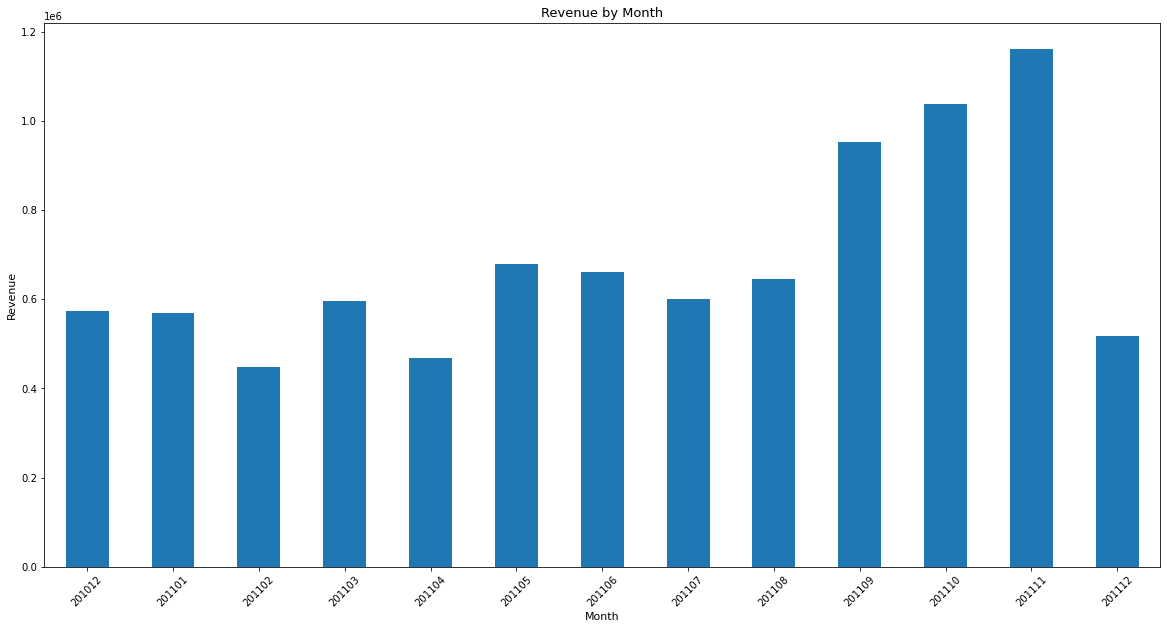

In [65]:
plot_bar(rev_by_month, 'Month', "Revenue", "Revenue by Month")

In [67]:
# 데이터 관찰
# 거의 비슷비슷하지만, 증가의 추이를 보임
# 9 10, 11 월에 확 증가
# 11월에 정점

# 북미 유럽쪽 쇼핑몰 데이터는 11,12월이 1년중 가장 많은 매출 기록 함

# 일반적으로는 12월이 많으나...
# 여기서는 그리 보이지 않는다

# 왜?
# 이 원본 데이터가 12월 전체를 표현하지 않고 있다.

# 함 확인해보자

In [68]:
retail['InvoiceDate'].sort_values(ascending=False)

# 2011-12-09 까지의 데이터다.. 즉 12월은 1/3 정도 밖에 반영이 안된셈이다.

397883   2011-12-09 12:50:00
397875   2011-12-09 12:50:00
397882   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
                 ...        
4        2010-12-01 08:26:00
3        2010-12-01 08:26:00
2        2010-12-01 08:26:00
1        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [70]:
# 완성코드

---
# 요일별 매출

In [69]:
# 이제 요일별 매출을 뽑아보자
# invoicedate 를 날짜형으로 뽑았기 때문에 .  굉장히 쉽게 요일을 구할수 있다. (날짜 -> 요일)

In [77]:
retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).size()

0    64893
1    66473
2    68885
3    80035
4    54825
6    62773
dtype: int64

In [79]:
rev_by_dow =  retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

In [81]:
# 관찰
# 다른데이터가 없기 때문에 유추할수는 없지만
# 회사의 방침? 일까?  5 (토요일) 데이터가 없다

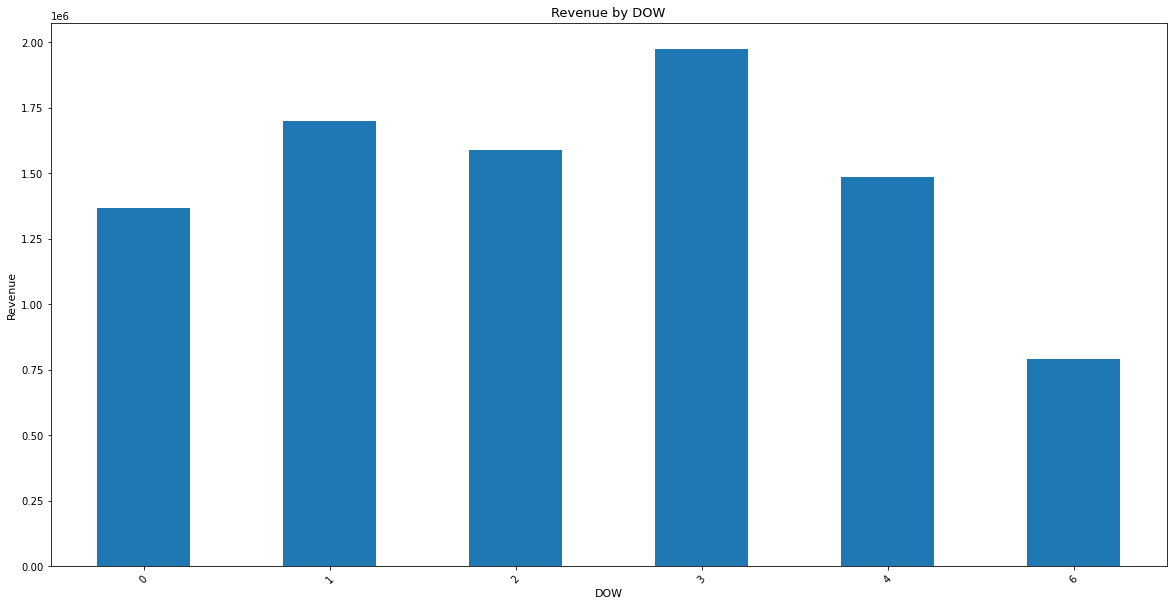

In [83]:
# 시각화 해봅시다
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

In [84]:
# 위에서 0, 1, 2, .. 6 으로 표현되니까.. 보기가 쉽지 않죠..
# 간단한 트릭을 써서 바꿔보도록 하겠습니다

In [89]:
DAY_OF_WEEK = ['Mon', 'Tue', 'Wed', "Thu", 'Fri', "Sat", 'Sun']  # 월요일 인덱스가 0 이라서.

In [90]:
#  DAY_OF_WEEK[rev_by_dow]  # <-- 에러다 . 왜?  위는 일반 리스트이기 때문에

In [91]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', "Thu", 'Fri', "Sat", 'Sun'])

In [94]:
rev_by_dow.index

Int64Index([0, 1, 2, 3, 4, 6], dtype='int64')

In [96]:
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]

In [100]:
rev_by_dow

Mon    1367146.411
Tue    1700634.631
Wed    1588336.170
Thu    1976859.070
Fri    1485917.401
Sun     792514.221
Name: CheckoutPrice, dtype: float64

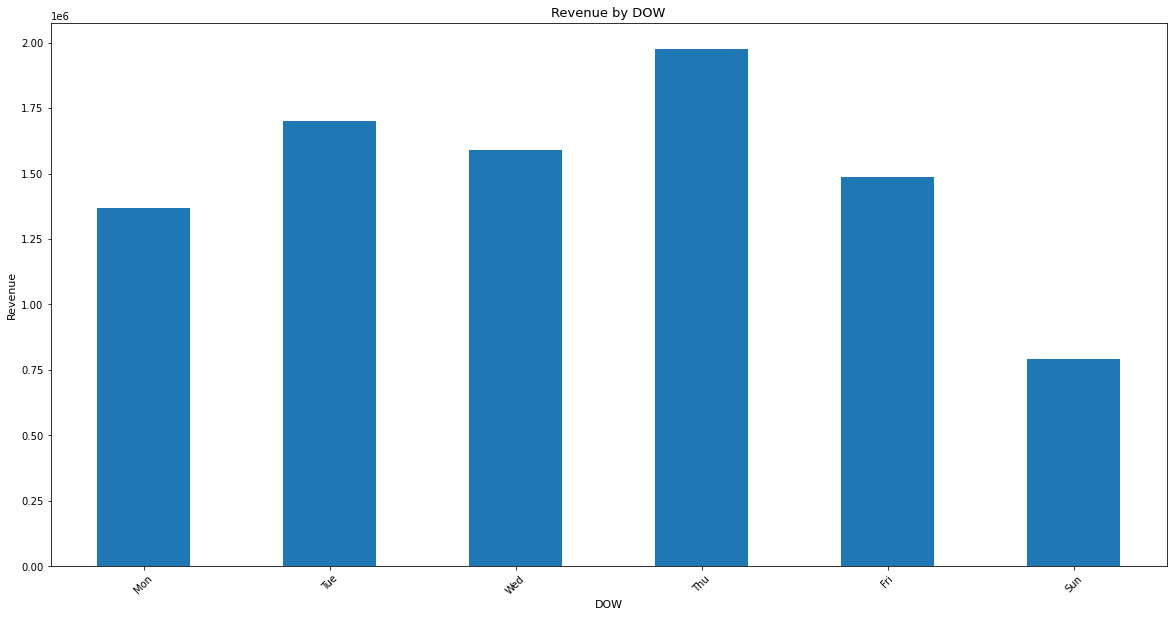

In [98]:
# 이제는 각각의 요일이 보일 것이다.
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

In [99]:
# 데이터 관찰
# 목요일 까진 완만히 증가하다가
# 목요일 이후론 하락함.

---
# 시간별 매출

In [101]:
# 시간별 매출.
# 앞에서 한것과 거의 차이가 없습니다

In [103]:
retail.set_index('InvoiceDate').groupby(lambda date:date.hour).size()

6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
dtype: int64

In [102]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
rev_by_hour

6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

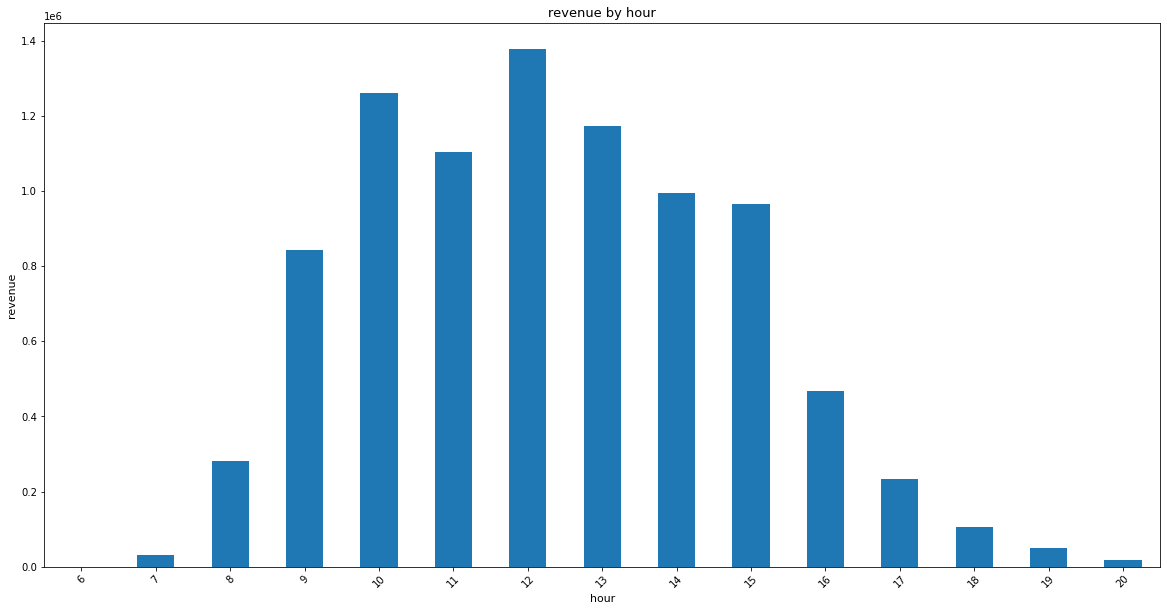

In [104]:
plot_bar(rev_by_hour, 'hour', 'revenue', 'revenue by hour')

In [105]:
# 결과 고찰
# 재미있는 사실.  새벽시간에 는 주문이 없다.
# 12시까지 증가세
# 3시 이후에는 팍 감소..

# 분석이란 이렇게 유추로부터 시작합니다
# "3시 이후에는 왜 떨어지는가?"
# 유추를 해보는 겁니다
# 직장인들이 퇴근을 하는 시간이라서?
# 그렇다면, 우리는 이 시간을 버리는 시간으로 보고
# 그 나머지 시간에 집중해야 한다... <-- 뭐 이런식으로 유추하면서 데이터 분석을 해나갈수 있겠죠

# 섣불리 유추하는 것은 굉장히 위험합니다.
# 현상을 보고,  그 현상을 파악하고 
# 거기서부터 '가설' 을 세우고, 그 가설을 '검증' 하기 위해서 
# 하나씩 테스트 (ex : A-B 테스트) 를 해보는 것이 중요합니다.

# 자. 암튼, 현상을 파악하는게 분석의 첫번째 단계입니다

# 그래서
# 지금까지 발견된것으로부터 정리를 해보겠씁니다 ↓


#### 매출 데이터로부터 insight 
 - 전체 매출의 82%가 UK에서 발생
 - 11년도의 가장 많은 주문이 발생한 달 11월(12월의 전체 데이터가 반영이 되진 않았음)
  - 11, 12월의 판매량이 압도(블랙프라이데이, 사이버먼데이, 크리스마스 휴일)
 - 일주일중 목요일까지는 성장세를 보이다가, 이후로 하락(토요일에는 주문X)
 - 7시를 시작으로 주문이 시작되어 12시까지 증가세, 15시까지 하락을, 15시 이후 부터 급락)
    - 유추: 점심시간 자유,  15시부터는 퇴근 페이스

In [ ]:
# 위와 같이 정리를 하곤
# 추가적으로 더 많은 실험을 할수도 있고 도출해낼수 있다.

---
# 제품별 metrics
 - Top 10 판매 제품
 - Top 10 매출 제품

In [106]:
# 다음으론 가장 많은 매출/판매을 올린 제품을 뽑아봅시다

In [107]:
# 제품코드 StockCode 기준으로 그룹핑
retail.groupby('StockCode').size()

StockCode
10002       49
10080       21
10120       30
10123C       3
10124A       5
          ... 
C2         133
DOT         16
M          284
PADS         3
POST      1099
Length: 3665, dtype: int64

In [111]:
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]  # 판매수량 Quantity
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [ ]:
# 매출이 가장 높은 Top10

In [112]:
top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]  # 판매수량 Quantity
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

In [ ]:
# 23843 상품은    168469.60  의 매출을 올림

In [ ]:
# 어떤 상품들이 많이 팔렸는지.  상품별로 월별 추이도 확인할수 있다.

#### top 3 아이템의 월별 판매량 추이

In [113]:
# Tom10 으로 안한이유는 12개월 x 10개 => 120개...  하나의 그래프에 표현하기 힘들어서

In [114]:
# "제품-월" 2-level 의  그룹으로 그룹핑 해야 한다.
retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).size()

StockCode        
10002      201012     16
           201101     18
           201102      5
           201103      5
           201104      5
                    ... 
POST       201108     89
           201109    111
           201110    118
           201111    162
           201112     49
Length: 30407, dtype: int64

In [115]:
retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']]
# 일단 이 결과는 전체 상품에 대한 것이다.
# 우리는 top3 상품에 대한것으로 해야 한다

Quantity  CheckoutPrice
StockCode                                
10002     201012       224         190.40
          201101       337         286.45
          201102        50          42.50
          201103        23          19.55
          201104       189         160.65
...                    ...            ...
POST      201108       237        5185.95
          201109       279        5894.50
          201110       338        7993.50
          201111       460       10349.95
          201112       123        2760.00

[30407 rows x 2 columns]

In [117]:
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [118]:
top_selling[:3]  # top3

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int32

In [121]:
top_selling[:3].index  # top3 의 인덱스

Index(['23843', '23166', '84077'], dtype='object', name='StockCode')

In [123]:
monthly_top3 = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling[:3].index]
monthly_top3

Quantity  CheckoutPrice
StockCode                                
23843     201112     80995      168469.60
23166     201101     74215       77183.60
          201105       792         869.04
          201106       391         458.51
          201107       718         826.94
          201108       405         486.09
          201109       342         397.26
          201110       235         283.67
          201111       631         708.11
          201112       187         203.51
84077     201012      5139        1150.47
          201101      1488         385.44
          201102      3457         795.17
          201103      3888         943.20
          201104     10224        2281.44
          201105      4944        1249.44
          201106      1920         533.76
          201107      3600         982.56
          201108      2256         654.24
          201109      3462         985.70
          201110      8174        1953.98
          201111      4500        1294.20
          201112      1363         376.65

In [ ]:
# 신기하게도 23843 상품은 201112  한달동안에만 판매된 량이다
# 이 경우 이 상품은 언제 입정이 되었고, 얼마나 많은 사람들이 사 갔는지 파악하는 것도 중요하다.


In [122]:
# 출력해보자

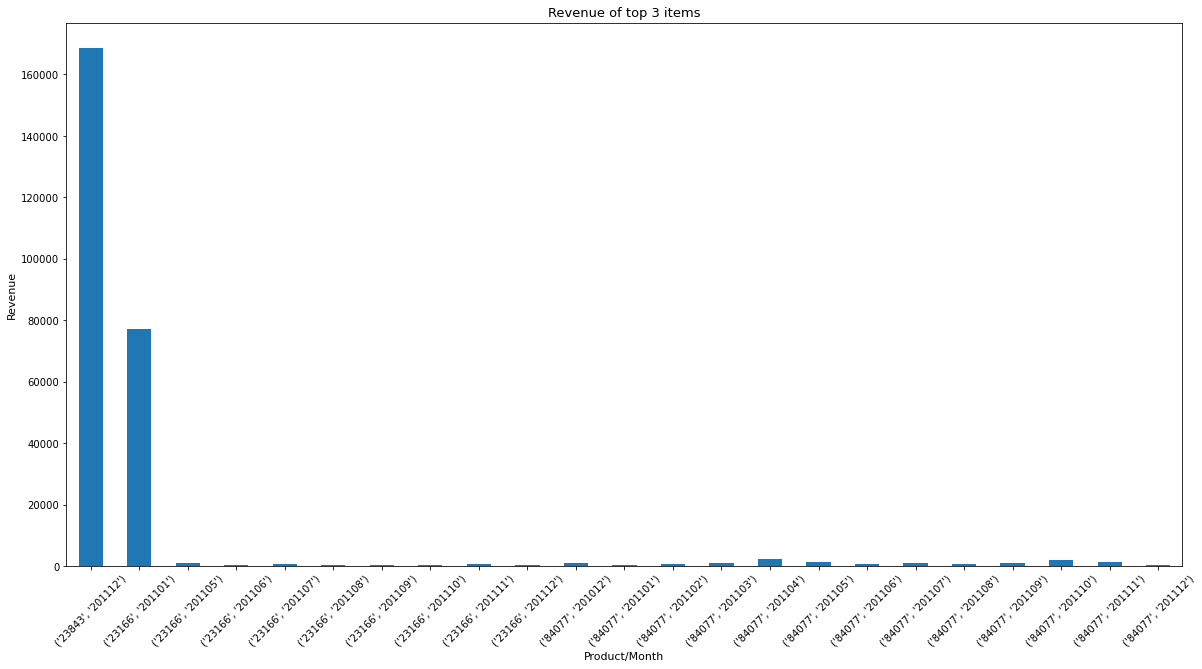

In [126]:
plot_bar(monthly_top3['CheckoutPrice'], 'Product/Month', 'Revenue', "Revenue of top 3 items")
# 각 아이템별로 판매 추이 알수 있다.

In [127]:
# 한달 사이에서만 팔린 anomaly 현상을 볼수 있다.
# 뭔가 월별 특성을 타는 아이템일수도? 혹은 특별한 이유가 있는지 분석해보는게 중요하다.

In [128]:
# 일단 이렇게 '현상파악' 을 해보았습니다.
# 비즈니스팀에 전달해서 원인 파악등이 이루어져야 겠죠
# 이후 필요한 실험을 더 해볼수 있어야 겠구요.

In [ ]:
# 실제 실무에서도 이와 같이 방식으로 분석하느게 많이 쓰입니다
# 꼭 notebok 을 이용하는건 아니더라도
# 비즈니스 팀에서 weekly , montly base 의 리포팅을 원합니다.
# 그러면 이와가팅 분석해서 전달해주는게 중요한 정보가 됩니다.


In [129]:
# 다음 시간에는 우수 고객을 선별해보는 분석을 해보겠습니다.